### Step 1: Load the Data

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, median_absolute_error, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

In [26]:
# Load the actual and predicted CSVs into pandas DataFrames
actual_df = pd.read_csv('./data/final/actual.csv')  # Actual values CSV file
predicted_df = pd.read_csv('./data/final/predicted.csv', skipinitialspace=True)  # Predicted values CSV file

In [27]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   personality_word  300 non-null    object 
 1   word_valence      300 non-null    object 
 2   mean_val          300 non-null    float64
 3   mean_img          300 non-null    float64
 4   mean_freq         300 non-null    float64
dtypes: float64(3), object(2)
memory usage: 11.8+ KB


In [28]:
predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   personality_word  300 non-null    object 
 1   word_valence      300 non-null    object 
 2   mean_val          300 non-null    float64
 3   mean_img          300 non-null    float64
 4   mean_freq         300 non-null    float64
dtypes: float64(3), object(2)
memory usage: 11.8+ KB


In [29]:
actual_df

,personality_word,word_valence,mean_val,mean_img,mean_freq
0,Unlovable,Negative,7.316583,40.719388,17.126904
1,Cruel,Negative,7.457286,78.055838,37.512690
2,Criminal,Negative,7.768844,85.456853,48.527919
3,Monstrous,Negative,8.085859,71.467005,14.406091
4,Fraudulent,Negative,8.151515,51.856410,27.964286
...,...,...,...,...,...
295,Intelligent,Positive,87.613065,76.619289,64.847716
296,Kind,Positive,87.673367,75.604061,73.314721
297,Genuine,Positive,88.683417,49.395939,59.507614
298,Trustworthy,Positive,89.135678,56.126904,55.395939


In [30]:
predicted_df

,personality_word,word_valence,mean_val,mean_img,mean_freq
0,Unlovable,negative,15.0,30.0,10.0
1,Cruel,negative,10.0,40.0,15.0
2,Criminal,negative,5.0,45.0,20.0
3,Monstrous,negative,10.0,50.0,10.0
4,Fraudulent,negative,10.0,50.0,30.0
...,...,...,...,...,...
295,Intelligent,positive,90.0,85.0,75.0
296,Kind,positive,90.0,75.0,85.0
297,Genuine,positive,85.0,80.0,80.0
298,Trustworthy,positive,90.0,80.0,75.0


In [32]:
rows_with_na = predicted_df[predicted_df.isna().any(axis=1)]
rows_with_na

,personality_word,word_valence,mean_val,mean_img,mean_freq


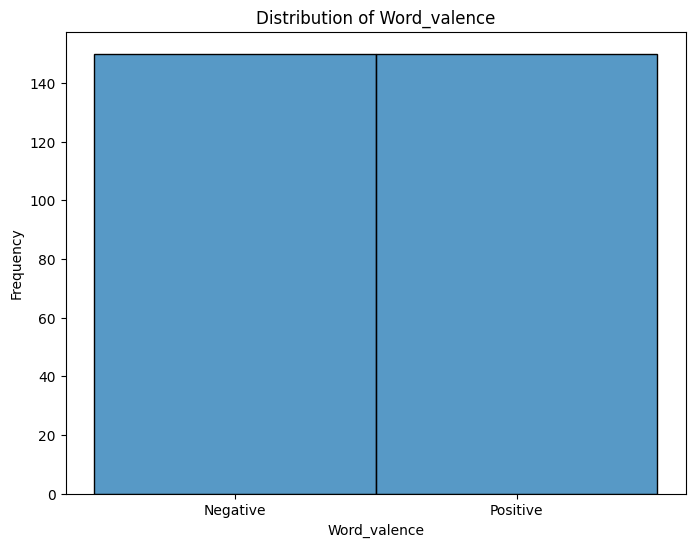

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(actual_df['word_valence'])  # kde=True adds a kernel density estimate line
plt.title('Distribution of Word_valence')
plt.xlabel('Word_valence')
plt.ylabel('Frequency')
plt.show()

### Step 2: Preprocess the Data

In [34]:
# Map the Word_valence column to binary values, handling case-insensitivity
word_valence_map = {'positive': 1, 'negative': 0}

# Convert the 'word_valence' column to lowercase before mapping
actual_df['word_valence'] = actual_df['word_valence'].str.lower().map(word_valence_map)
predicted_df['word_valence'] = predicted_df['word_valence'].str.lower().map(word_valence_map)


### Step 3: Evaluate the Binary Classification (Word_valence)

Accuracy: 0.9966666666666667
Precision: 0.9933774834437086
Recall: 1.0
F1 Score: 0.9966777408637874


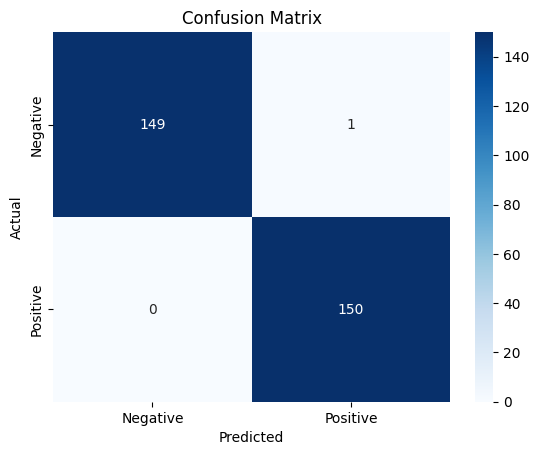

In [35]:
# Binary Classification Metrics
y_actual_valence = actual_df['word_valence']
y_pred_valence = predicted_df['word_valence']

# Accuracy
accuracy = accuracy_score(y_actual_valence, y_pred_valence)

# Precision, Recall, F1-Score (both classes: Positive and Negative)
precision, recall, f1, _ = precision_recall_fscore_support(y_actual_valence, y_pred_valence, average='binary')

# Confusion Matrix
conf_matrix = confusion_matrix(y_actual_valence, y_pred_valence)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Step 4: Evaluate the Regression Tasks (Mean_VAL, Mean_IMG, Mean_FREQ)

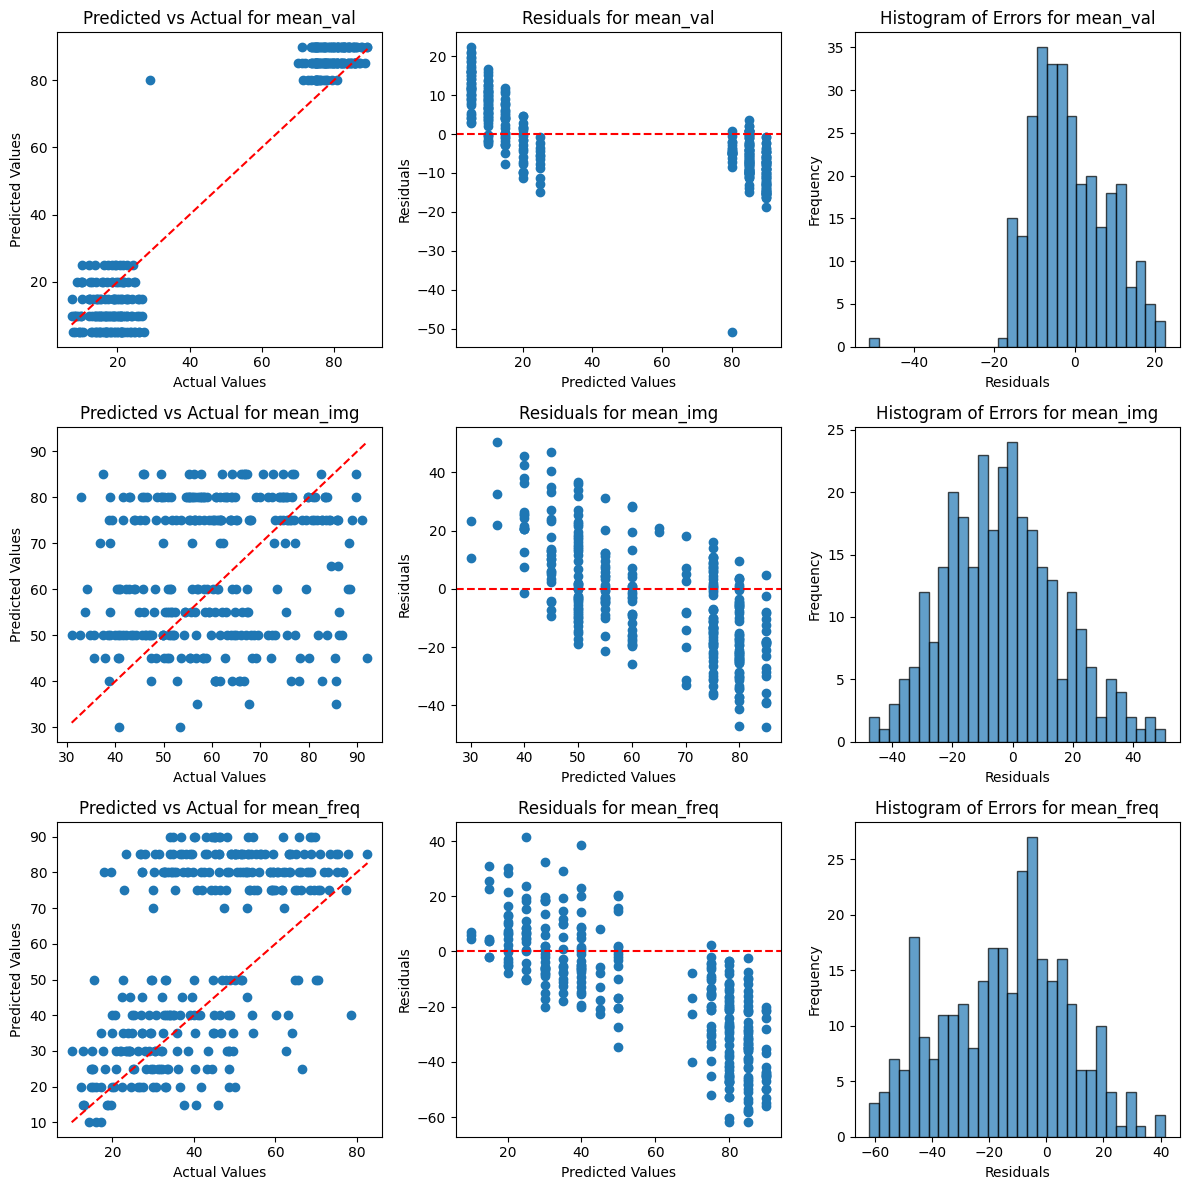

,Score Label,MAE,MSE,RMSE,R²,Adjusted R²,EVS,MedAE,Pearson Correlation,Spearman Correlation,Paired t-test p-value,Wilcoxon p-value
0,mean_val,7.829643,91.435784,9.562206,0.905823,0.905507,0.907095,7.226131,0.978351,0.791764,4.392324e-02,2.245231e-02
1,mean_img,15.377936,362.742526,19.045801,-0.776298,-0.782259,-0.720559,13.500000,0.176797,0.156345,2.035832e-03,7.899934e-04
2,mean_freq,20.674938,682.574749,26.126132,-1.456739,-1.464984,-0.691926,17.010152,0.560065,0.533130,4.992816e-26,2.460780e-22


In [36]:
from scipy.stats import pearsonr, spearmanr, ttest_rel, wilcoxon

# Function to calculate Adjusted R²
def adjusted_r2(y_actual, y_pred, n, p):
    """
    Calculates Adjusted R², which adjusts R² for the number of predictors in the model.
    This metric accounts for overfitting by penalizing for too many features.
    Formula: Adj R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]
    """
    r2 = r2_score(y_actual, y_pred)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

# Function to evaluate regression
def evaluate_regression(y_actual, y_pred, col):
    """
    Evaluates regression model performance using multiple metrics.
    Parameters:
        y_actual: Actual target values
        y_pred: Predicted target values
        col: Column name (score label) for identifying the metric
    
    Returns:
        A tuple of performance metrics
    """
    # MAE: Mean Absolute Error, average magnitude of errors
    mae = mean_absolute_error(y_actual, y_pred)  
    
    # MSE: Mean Squared Error, penalizes large errors more than MAE
    mse = mean_squared_error(y_actual, y_pred)  
    
    # RMSE: Root Mean Squared Error, interpretable in the same units as the target variable
    rmse = np.sqrt(mse)  
    
    # R²: Coefficient of Determination, indicates how well the model explains the variance
    r2 = r2_score(y_actual, y_pred)  
    
    # Adjusted R²: Adjusts R² for the number of features in the model
    adj_r2 = adjusted_r2(y_actual, y_pred, len(y_actual), 1)  # Assuming a single predictor for simplicity
    
    # EVS: Explained Variance Score, measures the proportion of variance explained by the model
    evs = explained_variance_score(y_actual, y_pred)  
    
    # MedAE: Median Absolute Error, robust to outliers
    medae = median_absolute_error(y_actual, y_pred)  
    
    return mae, mse, rmse, r2, adj_r2, evs, medae

# Define the list of columns you're evaluating (can be the columns of your predicted_df)
columns_to_evaluate = ['mean_val', 'mean_img', 'mean_freq']

# Initialize an empty list to store the evaluation results
evaluation_results = []

# Set up the figure for grid plots (1 row, 3 columns for each model metric)
n_features = len(columns_to_evaluate)
fig, axes = plt.subplots(n_features, 3, figsize=(12, 4 * n_features))

# Loop through each column and evaluate
for i, col in enumerate(columns_to_evaluate):
    y_actual = actual_df[col]  # Actual target values for the column
    y_pred = predicted_df[col]  # Predicted values for the column
    
    # Call the evaluate_regression function and get the metrics
    mae, mse, rmse, r2, adj_r2, evs, medae = evaluate_regression(y_actual, y_pred, col)
    
    # Calculate Pearson and Spearman correlations
    pearson_corr, _ = pearsonr(y_actual, y_pred)  # Pearson Correlation: linear relationship
    spearman_corr, _ = spearmanr(y_actual, y_pred)  # Spearman Correlation: monotonic relationship
    
    # Paired t-test: Tests whether the means of the actual and predicted values are significantly different
    t_stat, p_val_ttest = ttest_rel(y_actual, y_pred)
    
    # Wilcoxon Signed Rank Test: Non-parametric test to compare paired samples
    stat, p_val_wilcoxon = wilcoxon(y_actual, y_pred)
    
    # Append the evaluation results
    evaluation_results.append({
        'Score Label': col,
        'MAE': mae,  # Mean Absolute Error
        'MSE': mse,  # Mean Squared Error
        'RMSE': rmse,  # Root Mean Squared Error
        'R²': r2,  # R-squared
        'Adjusted R²': adj_r2,  # Adjusted R-squared
        'EVS': evs,  # Explained Variance Score
        'MedAE': medae,  # Median Absolute Error
        'Pearson Correlation': pearson_corr,  # Pearson correlation coefficient
        'Spearman Correlation': spearman_corr,  # Spearman correlation coefficient
        'Paired t-test p-value': p_val_ttest,  # Paired t-test p-value
        'Wilcoxon p-value': p_val_wilcoxon  # Wilcoxon Signed Rank Test p-value
    })
    
    # Plotting the model's performance
    ax = axes[i, 0]
    ax.scatter(y_actual, y_pred)  # Scatter plot: Actual vs Predicted
    ax.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], 'r--')  # Diagonal line for perfect predictions
    ax.set_title(f'Predicted vs Actual for {col}')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    
    # Residuals plot (errors between actual and predicted values)
    residuals = y_actual - y_pred
    ax = axes[i, 1]
    ax.scatter(y_pred, residuals)  # Scatter plot of residuals
    ax.axhline(y=0, color='r', linestyle='--')  # Line at y=0 for easy identification of bias
    ax.set_title(f'Residuals for {col}')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    
    # Histogram of errors (residuals)
    ax = axes[i, 2]
    ax.hist(residuals, bins=30, edgecolor='black', alpha=0.7)  # Histogram of residuals
    ax.set_title(f'Histogram of Errors for {col}')
    ax.set_xlabel('Residuals')
    ax.set_ylabel('Frequency')

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()

# Convert the evaluation results into a pandas DataFrame for better readability
evaluation_df = pd.DataFrame(evaluation_results)

# Display the evaluation results
display(evaluation_df)

# Save the evaluation results to a CSV file for later use
# evaluation_df.to_csv("evaluation_results.csv", index=False)

